In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:
data_ = pd.read_csv('../data/nigerian_houses.csv')b

data_.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,NaN,NaN,NaN,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,NaN,NaN,NaN,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,NaN,NaN,NaN,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


### Describing the data

In [3]:
data = data_

In [4]:
data.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,23937.000000,21283.000000,21729.000000,14368.000000,2.432600e+04
mean,4.344321,4.543720,5.197432,4.070643,3.013802e+08
std,1.146885,1.233024,1.295864,1.821033,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,3.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,5.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       23937 non-null  float64
 1   bathrooms      21283 non-null  float64
 2   toilets        21729 non-null  float64
 3   parking_space  14368 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


<Figure size 864x432 with 0 Axes>

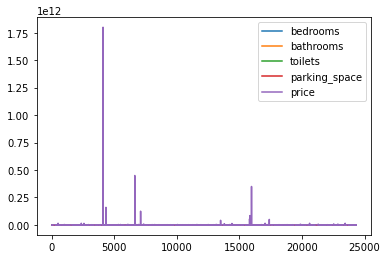

In [11]:
plt.figure(figsize=(12,6))
data.plot()

<AxesSubplot:>

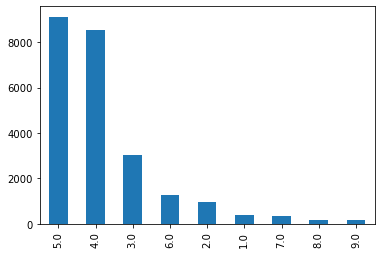

In [13]:
data['bedrooms'].value_counts().plot(kind="bar")

<AxesSubplot:>

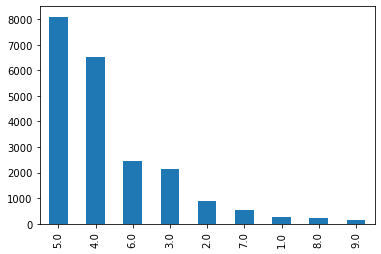

In [16]:
data['bathrooms'].value_counts().plot(kind="bar")

<Figure size 864x432 with 0 Axes>

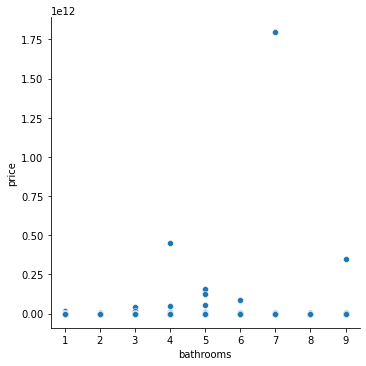

In [22]:
plt.figure(figsize=(12, 6))
sn.relplot(x="bathrooms", y="price", data=data)

In [54]:
corr_mat = data.corr()

In [55]:
corr_mat['price'].sort_values(ascending=False)

price                      1.000000
bedrooms_bathrooms         0.030400
bedrooms                   0.025734
bathrooms_toilets          0.022148
bathrooms                  0.021965
bathrooms_plus_ toilets    0.020104
parking_space              0.018370
toilets                    0.015486
bedrooms_per_bathrooms     0.002377
bathrooms_per_bedrooms    -0.003401
Name: price, dtype: float64

In [37]:
data['bedrooms'].median()

4.0

In [38]:
data['bedrooms'].fillna(data['bedrooms'].median(), inplace=True)
data['bathrooms'].fillna(data['bathrooms'].median(), inplace=True)
data['toilets'].fillna(data['toilets'].median(), inplace=True)
data['parking_space'].fillna(data['parking_space'].median(), inplace=True)

In [40]:
data.isnull().sum()

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
title            0
town             0
state            0
price            0
dtype: int64

In [41]:
data['bathrooms_per_bedrooms'] = data['bathrooms'] / data['bedrooms']

In [44]:
data['bedrooms_per_bathrooms'] = data['bedrooms'] / data['bathrooms']

In [47]:
data['bedrooms_bathrooms'] = data['bedrooms'] * data['bathrooms']

In [50]:
data['bathrooms_toilets'] = data['bathrooms'] * data['toilets']

In [53]:
data['bathrooms_plus_ toilets'] = data['bathrooms'] + data['toilets']

In [56]:
data.columns

Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town',
       'state', 'price', 'bathrooms_per_bedrooms', 'bedrooms_per_bathrooms',
       'bedrooms_bathrooms', 'bathrooms_toilets', 'bathrooms_plus_ toilets'],
      dtype='object')

In [59]:
df = data

In [61]:
data_

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,bathrooms_per_bedrooms,bedrooms_per_bathrooms,bedrooms_bathrooms,bathrooms_toilets,bathrooms_plus_ toilets
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0,0.833333,1.20,30.0,25.0,10.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0,1.250000,0.80,20.0,25.0,10.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,1.250000,0.80,20.0,25.0,10.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,1.000000,1.00,16.0,20.0,9.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,1.000000,1.00,16.0,20.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24321,2.0,2.0,2.0,4.0,Block of Flats,Kabusa,Abuja,15000000.0,1.000000,1.00,4.0,4.0,4.0
24322,4.0,5.0,5.0,4.0,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0,1.250000,0.80,20.0,25.0,10.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0,1.250000,0.80,20.0,25.0,10.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0,1.333333,0.75,12.0,16.0,8.0


In [62]:
df = pd.read_csv('../data/nigerian_houses.csv')

df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,NaN,NaN,NaN,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,NaN,NaN,NaN,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,NaN,NaN,NaN,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [63]:
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)
df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)
df['toilets'].fillna(df['toilets'].median(), inplace=True)
df['parking_space'].fillna(df['parking_space'].median(), inplace=True)

In [64]:
def attr_adder(data):
    
    data['bathrooms_per_bedrooms'] = data['bathrooms'] / data['bedrooms']
    data['bedrooms_per_bathrooms'] = data['bedrooms'] / data['bathrooms']
    data['bedrooms_bathrooms'] = data['bedrooms'] * data['bathrooms']
    data['bathrooms_toilets'] = data['bathrooms'] * data['toilets']
    
    return data

In [67]:
df = attr_adder(df)

In [68]:
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,bathrooms_per_bedrooms,bedrooms_per_bathrooms,bedrooms_bathrooms,bathrooms_toilets
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0,0.833333,1.2,30.0,25.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0,1.250000,0.8,20.0,25.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,1.250000,0.8,20.0,25.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,1.000000,1.0,16.0,20.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,1.000000,1.0,16.0,20.0


In [ ]:
features = df.drop(columns=['price'])